In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
import scipy.stats as ss

In [2]:
filepath = 'epa-sea-level.csv'

with open(filepath, 'r') as reader:
    print(reader)

<_io.TextIOWrapper name='epa-sea-level.csv' mode='r' encoding='cp1252'>


In [3]:
Sea_Level_Data = pd.read_csv(filepath) #File is converted to Dataframe

In [4]:
Sea_Level_Data

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


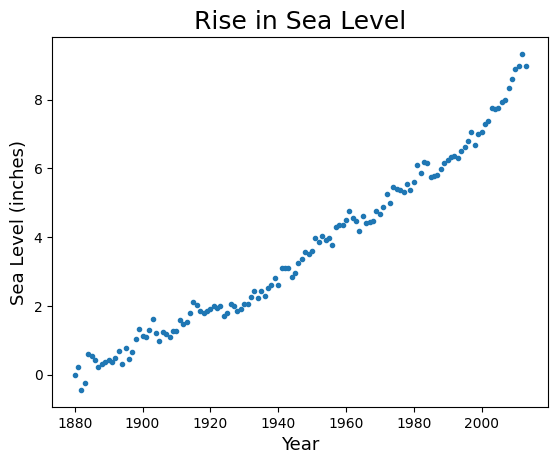

In [5]:
#Scatter Plot of 'CSIRO Adjusted Sea Level'(on Y-axis) with respect to Years(on X-axis).
ax = plt.subplot(1,1,1)
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Sea Level (inches)',  fontsize = 13)
plt.title('Rise in Sea Level',  fontsize = 18)
ax.plot(Sea_Level_Data['Year'], Sea_Level_Data['CSIRO Adjusted Sea Level'], 'o', markersize =3)

Text(0.5, 1.0, 'Rise in Sea Level')

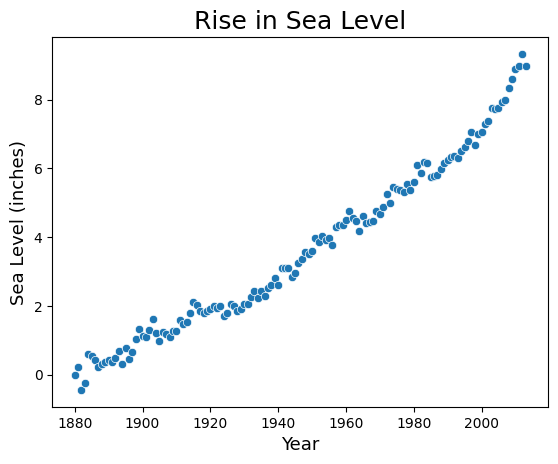

In [6]:
#Scatter Plot of 'CSIRO Adjusted Sea Level'(on Y-axis) with respect to Years(on X-axis).(Using Seaborn Library.)
sns.scatterplot(x = Sea_Level_Data['Year'], y = Sea_Level_Data['CSIRO Adjusted Sea Level'])
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Sea Level (inches)',  fontsize = 13)
plt.title('Rise in Sea Level',  fontsize = 18)

In [7]:
#Line best fitting the data is created using lingress function of Scipy.stats
best_fit = ss.linregress(Sea_Level_Data['Year'], Sea_Level_Data['CSIRO Adjusted Sea Level'])
best_fit 

LinregressResult(slope=0.06304458401213482, intercept=-119.06594196773983, rvalue=0.984757131182585, pvalue=3.788696979113155e-102, stderr=0.0009692118713287152, intercept_stderr=1.886943381242523)

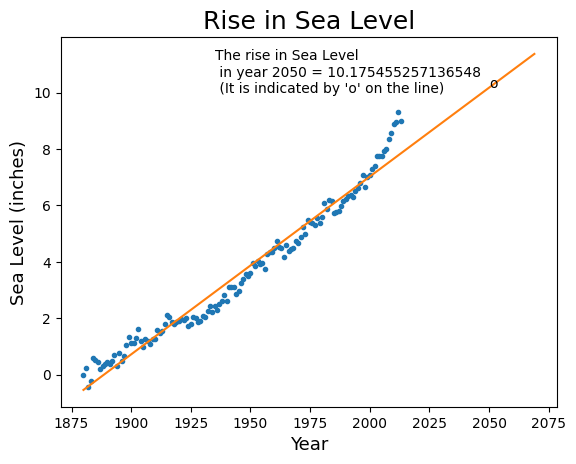

In [8]:
#Line Best fitting the data of sealevel rise each year is displayed on the scatterplot to predict the sea level in the year 2050.
ax = plt.subplot(1,1,1)
ax.plot(Sea_Level_Data['Year'], Sea_Level_Data['CSIRO Adjusted Sea Level'], 'o', markersize =3)
x = np.arange(np.min(Sea_Level_Data['Year']), 2070)
y_fit = best_fit[0]*x + best_fit[1]
A = best_fit[0]*(2050) + best_fit[1]
plt.text(2050, A, 'o')
plt.text(1935, 10, f"The rise in Sea Level\n in year 2050 = {A}\n (It is indicated by 'o' on the line)")
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Sea Level (inches)',  fontsize = 13)
plt.title('Rise in Sea Level',  fontsize = 18)
ax.plot(x,y_fit)

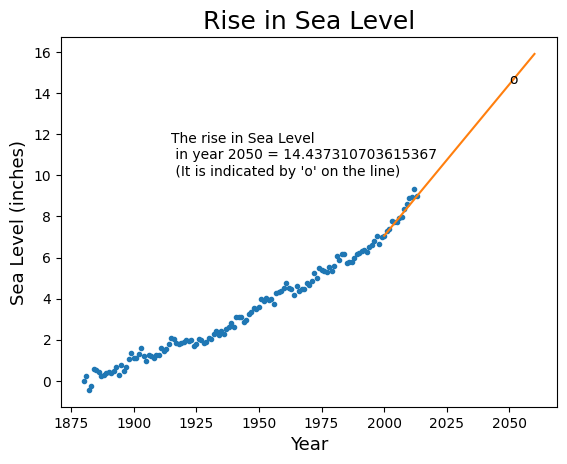

In [9]:
#Best Fitting Line is made using data of Year 2000 and the most recent year to predict the results in year 2050.
Most_Recent_Year = np.max(Sea_Level_Data['Year'])
Level1 = Sea_Level_Data['CSIRO Adjusted Sea Level'][Sea_Level_Data['Year'] == 2000]
Level2 = Sea_Level_Data['CSIRO Adjusted Sea Level'][Sea_Level_Data['Year'] == Most_Recent_Year]
Dep_variables = np.array([2000,Most_Recent_Year])
Dep_variables
InDep_variables_ = np.array([Level1,Level2])
a = InDep_variables_[0,0]
b = InDep_variables_[1,0]
InDep_variables = np.array([a,b])
best_fit1 = ss.linregress(Dep_variables, InDep_variables)
ax = plt.subplot(1,1,1)
ax.plot(Sea_Level_Data['Year'], Sea_Level_Data['CSIRO Adjusted Sea Level'], 'o', markersize =3)
x_ = np.array([2000,Most_Recent_Year, 2050, 2060])
y_fit_ = best_fit1[0]*x_ + best_fit1[1]
B = best_fit1[0]*(2050) + best_fit1[1]
plt.text(2050, B, 'o')
plt.text(1915, 10, f"The rise in Sea Level\n in year 2050 = {B}\n (It is indicated by 'o' on the line)")
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Sea Level (inches)',  fontsize = 13)
plt.title('Rise in Sea Level',  fontsize = 18)
ax.plot(x_,y_fit_)